In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

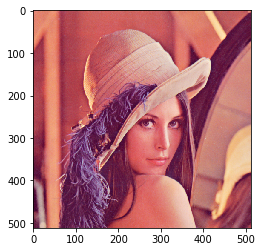

In [5]:
img = mpimg.imread('lena.png')
plt.imshow(img)

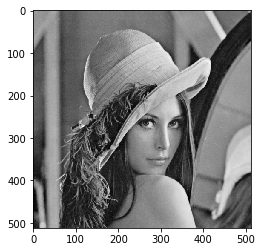

In [8]:
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')

In [26]:
w = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        dist = (i-10)**2 + (j-10)**2
        w[i,j] = np.exp(-dist/50)
        
        
w /= w.sum()

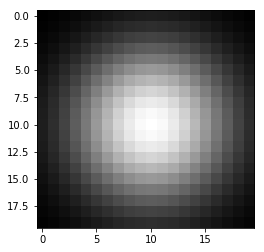

In [27]:
plt.imshow(w, cmap='gray')

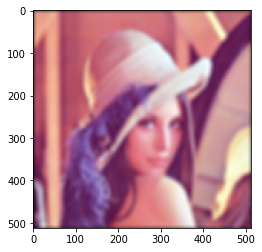

In [28]:
out_img = np.zeros(img.shape)
for i in range(3):
    out_img[:,:,i] = convolve2d(img[:,:,i], w, mode='same')
    out_img[:,:,i] /= out_img[:,:,i].max()
plt.imshow(out_img)

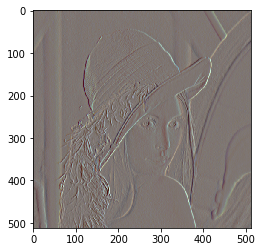

In [40]:
Hx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
edge_img_x = np.zeros(img.shape)
for i in range(3):
    edge_img_x[:,:,i] = convolve2d(img[:,:,i], Hx, mode='same')
    edge_img_x[:,:,i] = (edge_img_x[:,:,i]-edge_img_x[:,:,i].min())/(edge_img_x[:,:,i].max()-edge_img_x[:,:,i].min())
plt.imshow(edge_img_x)

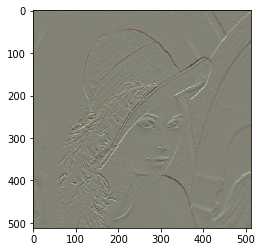

In [42]:
Hy = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32).T
edge_img_y = np.zeros(img.shape)
for i in range(3):
    edge_img_y[:,:,i] = convolve2d(img[:,:,i], Hy, mode='same')
    edge_img_y[:,:,i] = (edge_img_y[:,:,i]-edge_img_y[:,:,i].min())/(edge_img_y[:,:,i].max()-edge_img_y[:,:,i].min())
plt.imshow(edge_img_y)

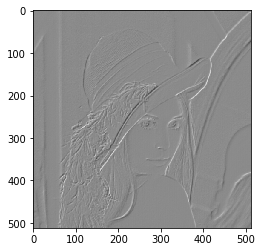

In [46]:
edge_img = np.sqrt(edge_img_x**2 + edge_img_y**2)
plt.imshow(edge_img[:,:,0], cmap='gray')